In [ ]:
DATA_PATH_IMG = '/content/drive/My Drive/Copie de 20190321_174348_0f1a_3B_AnalyticMS.tif'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install rasterio

     |████████████████████████████████| 19.3 MB 303 kB/s 


In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px 
import plotly.graph_objects as go
import matplotlib.pyplot as plt  
import os.path    
import glob
import rasterio
from skimage import io                                                                                   
from plotly.subplots import make_subplots
from PIL import Image
from sklearn import cluster
from rasterio.plot import show


In [ ]:
satdat = rasterio.open(DATA_PATH_IMG)

In [ ]:
# number of bands in this dataset
print(satdat.count)

4


In [ ]:
print(satdat.indexes)

(1, 2, 3, 4)


In [ ]:
satdat.profile

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 8341, 'height': 4213, 'count': 4, 'crs': CRS.from_epsg(32610), 'transform': Affine(3.0, 0.0, 544491.0,
       0.0, -3.0, 4191009.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}

In [ ]:
satdat.bounds

BoundingBox(left=544491.0, bottom=4178370.0, right=569514.0, top=4191009.0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'NIR')

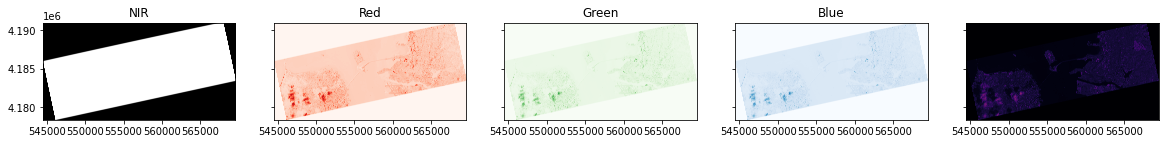

In [ ]:
from rasterio.plot import show
# Initialize subplots
fig, (ax0,ax1, ax2, ax3,ax4) = plt.subplots(ncols=5, nrows=1, figsize=(20, 13), sharey=True)

# Plot Red, Green and Blue (rgb)
show((satdat), ax=ax0)
show((satdat, 2), cmap='Reds', ax=ax1)
show((satdat, 3), cmap='Greens', ax=ax2)
show((satdat, 1), cmap='Blues', ax=ax3)
show((satdat, 4), cmap='inferno', ax=ax4)

# Add titles
ax0.set_title("Comb")
ax1.set_title("Red")
ax2.set_title("Green")
ax3.set_title("Blue")
ax0.set_title("NIR")

In [ ]:
blue, green, red ,nir= satdat.read()

In [ ]:
print(type(blue))


<class 'numpy.ndarray'>


In [ ]:
# How many dimensions would a single raster band have?  Two dimensions: rows and columns.
print(blue.ndim)

2


In [ ]:
# Take a look at the datatype of the values in this band.
print(blue.dtype)

uint16


In [ ]:
# Output a min & max pixel value in each band.

for band in [blue, green, red]:
    print("min {min} max {max}".format(min=band.min(), max=band.max()))

min 0 max 30256
min 0 max 20671
min 0 max 27564


In [ ]:
# scale values for display purposes
def scale(band):
    return band / 10000.0


In [ ]:
# Load the bands into numpy arrays
# recall that we previously learned PlanetScope band order is BGRN
blue = scale(satdat.read(1))
green = scale(satdat.read(2))
red = scale(satdat.read(3))
nir = scale(satdat.read(4))

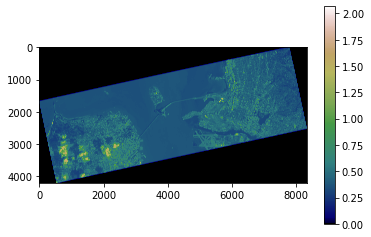

In [ ]:
# Plot the green band using a non-default color ramp & a color bar

fig = plt.imshow(green)
fig.set_cmap('gist_earth')
plt.colorbar()

# Display the results.
plt.show()



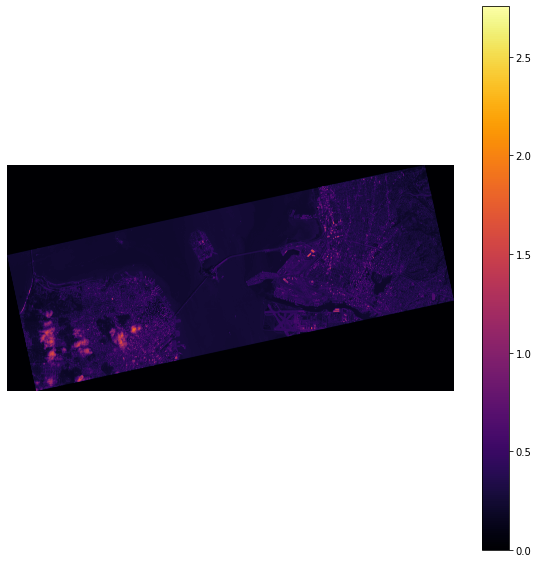

In [ ]:
# Plot the red band
plt.figure(figsize=[10,10])
fig = plt.imshow(red)
fig.set_cmap('inferno')
plt.colorbar()

# Since the axis labels are useless here, let's turn them off.
plt.axis('off')

# Display the results.
plt.show()



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


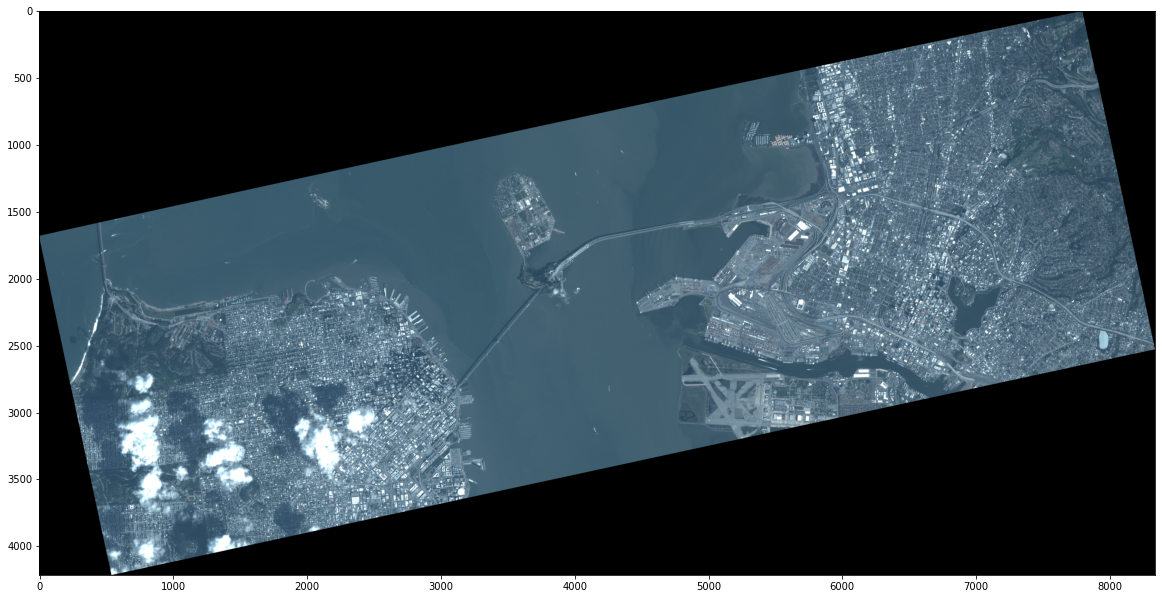

In [ ]:
plt.figure(figsize=[20,20])
rgb = np.dstack((red, green, blue))
plt.imshow(rgb)
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<function matplotlib.pyplot.show>

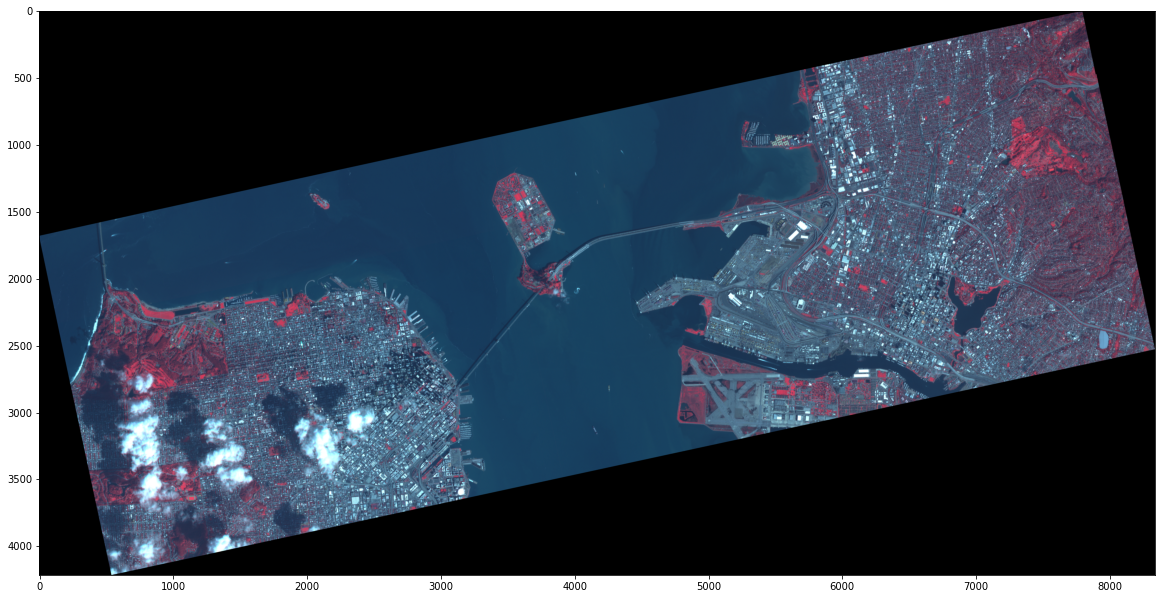

In [ ]:
plt.figure(figsize=[20,20])
nrg = np.dstack((nir,red,green))
plt.imshow(nrg)
plt.show

## Applying KMEANS

In [ ]:
# create an empty array with same dimension and data type
imgxyb = np.empty((satdat.height,satdat.width,satdat.count), satdat.meta['dtype'])# loop through the raster's bands to fill the empty array
for band in range(imgxyb.shape[2]):
    imgxyb[:,:,band] = satdat.read(band+1)

In [ ]:
imgxyb.shape

(4213, 8341, 4)

In [ ]:
# convert to 1d array
img1d=imgxyb[:,:,:4].reshape((imgxyb.shape[0]*imgxyb.shape[1],imgxyb.shape[2]))

In [ ]:
img1d.shape

(35140633, 4)

In [ ]:
cl = cluster.KMeans(n_clusters=4) # create an object of the classifier
param = cl.fit(img1d) # train it
img_cl = cl.labels_ # get the labels of the classes
img_cl = img_cl.reshape(imgxyb[:,:,0].shape) # reshape labels to a 3d array (one band only)

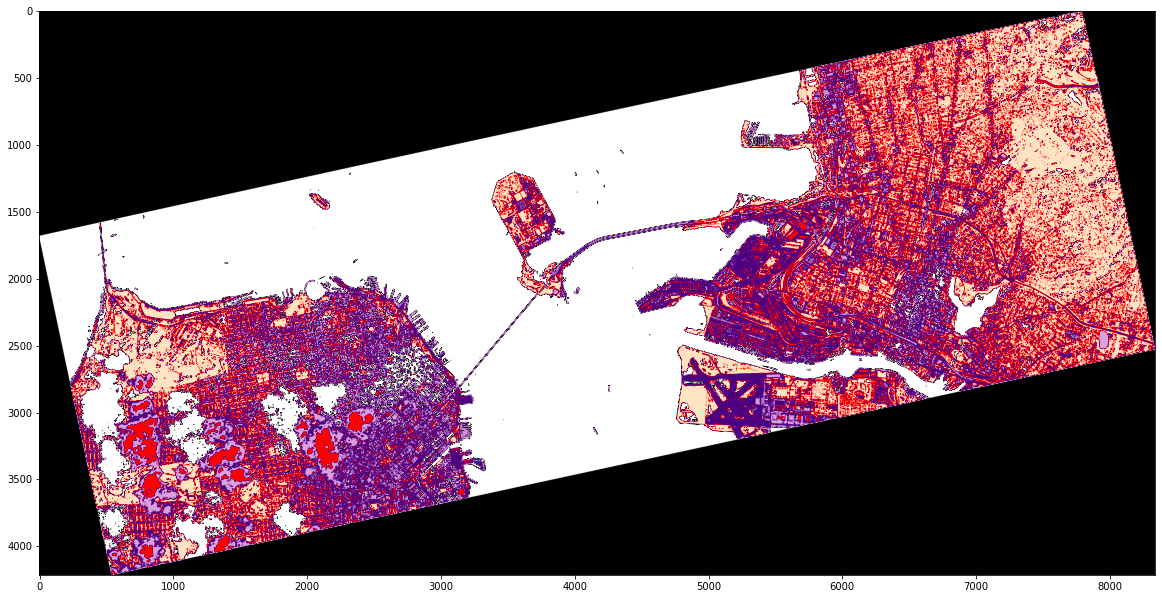

In [ ]:
import matplotlib.colors as mc
# Create a custom color map to represent our different 4 classes
cmap = mc.LinearSegmentedColormap.from_list("", ["steelblue","white","black","tan"])# Show the resulting array and save it as jpg image
plt.figure(figsize=[20,20])
plt.imshow(img_cl, cmap=cmap)
plt.show()
